In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
cats_dir = 'drive/MyDrive/cat'  # Replace with your path
dogs_dir = 'drive/MyDrive/dog'  # Replace with your path

# Load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), target_size=(150, 150))
        img = img_to_array(img)
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load cat and dog images
cats_images, cats_labels = load_images_from_folder(cats_dir, label=0)  # 0 for cats
dogs_images, dogs_labels = load_images_from_folder(dogs_dir, label=1)  # 1 for dogs

# Combine cats and dogs data
X = np.concatenate((cats_images, dogs_images))
y = np.concatenate((cats_labels, dogs_labels))

# Split into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

In [4]:
import numpy as np

# Convert RGB images to grayscale by averaging channels (if needed)
def rgb_to_grayscale(images):
    return np.mean(images, axis=3, keepdims=True)  # Shape: (N, H, W, 1)

# Example conversion (assuming X_train/X_val are RGB)
X_train_gray = rgb_to_grayscale(X_train)
X_val_gray = rgb_to_grayscale(X_val)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data generator (no augmentation)
val_datagen = ImageDataGenerator()

# Create data generators
train_generator = train_datagen.flow(
    X_train_gray, y_train,
    batch_size=32,
    shuffle=True,
)

validation_generator = val_datagen.flow(
    X_val_gray, y_val,
    batch_size=32,
    shuffle=False,
)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Build the model
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Conv Block 4
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Conv Block 5
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Dense layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))  # Binary classification (cats vs. dogs)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(X_val) // 32
)

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.4905 - loss: 0.6967 - val_accuracy: 0.5211 - val_loss: 0.6930
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.6847 - val_accuracy: 0.5194 - val_loss: 0.6930
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.5193 - loss: 0.6932 - val_accuracy: 0.5524 - val_loss: 0.6931
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 0.6915 - val_accuracy: 0.5659 - val_loss: 0.6931
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.5020 - loss: 0.6931 - val_accuracy: 0.5600 - val_loss: 0.6930
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4062 - loss: 0.6966 - val_accuracy: 0.5718 - val_loss: 0.6930
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.5002 - loss: 0.6930 - val_accuracy: 0.5211 - val_loss: 0.6927
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4375 - loss: 0.6971 - val_a

In [8]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 9, 9, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 12,083,972 (46.10 MB)

 Trainable params: 6,041,985 (23.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,041,987 (23.05 MB)

In [9]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6477 - loss: 0.6175
Validation Accuracy: 66.25%


In [ ]:
model.save("cat_and_dog_classifier.keras")

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load your trained model (make sure you update the path as necessary)
model = tf.keras.models.load_model('net.keras')

def load_and_preprocess_image(image_path, target_size=(150, 150, 1)):
    """
    Load an image from disk, convert it to grayscale, resize it, and preprocess it for prediction.

    Parameters:
        image_path (str): The file path to the image.
        target_size (tuple): Desired image size (width, height).

    Returns:
        A preprocessed image array ready for prediction.
    """
    # Load the image in grayscale mode (color_mode='grayscale')
    img = load_img(image_path, color_mode='grayscale', target_size=target_size)

    # Convert the PIL image to a NumPy array
    img_array = img_to_array(img)

    # Normalize the image pixels to [0, 1]
    img_array /= 255.0

    # The model expects a batch of images, so add an extra dimension to create a batch of size 1.
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Example usage: Update the path to your test image
test_image_path = 'cattt.jpg'
processed_image = load_and_preprocess_image(test_image_path)

# Make a prediction using the model
prediction = model.predict(processed_image)

# Interpret the prediction (assuming 0 = Cat and 1 = Dog)
if prediction[0] > 0.5:
    print("The model predicts: Dog")
else:
    print("The model predicts: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The model predicts: Cat


### **Q2: Experiment with Network Architecture**
Example Modification: Fully Convolutional Network (No Pooling)
Replace MaxPooling2D with Conv2D layers using strides=2 for downsampling:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dropout, Flatten, Dense
import tensorflow as tf

# Build Fully Convolutional Model
model_fcn = Sequential()

# Conv Block 1
model_fcn.add(Conv2D(32, (3, 3), strides=2, padding='same', input_shape=(150, 150, 1)))
model_fcn.add(Activation('relu'))
model_fcn.add(Dropout(0.25))

# Conv Block 2
model_fcn.add(Conv2D(64, (3, 3), strides=2, padding='same'))
model_fcn.add(Activation('relu'))
model_fcn.add(Dropout(0.25))

# Conv Block 3
model_fcn.add(Conv2D(128, (3, 3), strides=2, padding='same'))
model_fcn.add(Activation('relu'))
model_fcn.add(Dropout(0.25))

# Conv Block 4
model_fcn.add(Conv2D(256, (3, 3), strides=2, padding='same'))
model_fcn.add(Activation('relu'))
model_fcn.add(Dropout(0.25))

# Conv Block 5
model_fcn.add(Conv2D(512, (3, 3), strides=2, padding='same'))
model_fcn.add(Activation('relu'))
model_fcn.add(Dropout(0.25))

# Final Conv Layer before Fully Connected
model_fcn.add(Conv2D(512, (3, 3), padding='same'))
model_fcn.add(Activation('relu'))
model_fcn.add(Dropout(0.5))

# Flatten and Dense layers
model_fcn.add(Flatten())
model_fcn.add(Dense(512))
model_fcn.add(Activation('relu'))
model_fcn.add(Dropout(0.5))

model_fcn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_fcn.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])

# Train the model
history_fcn = model_fcn.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(X_val) // 32
)

# Evaluate performance
val_loss_fcn, val_acc_fcn = model_fcn.evaluate(validation_generator)
print(f'Validation Accuracy (Fully Convolutional): {val_acc_fcn * 100:.2f}%')

model_fcn.save("cat_and_dog_classifier_fcn.keras")


Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 127ms/step - accuracy: 0.5046 - loss: 0.6938 - val_accuracy: 0.5211 - val_loss: 0.6922
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.6970 - val_accuracy: 0.5211 - val_loss: 0.6922
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.5093 - loss: 0.6932 - val_accuracy: 0.5456 - val_loss: 0.6927
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 0.6900 - val_accuracy: 0.5220 - val_loss: 0.6929
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.5277 - loss: 0.6925 - val_accuracy: 0.5068 - val_loss: 0.6915
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 0.6970 - val_accuracy: 0.5034 - val_loss: 0.6916
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.5014 - loss: 0.6936 - val_accuracy: 0.5397 - val_loss: 0.6923
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6250 - loss: 0.6846 - val_ac

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 9, 9, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 12,083,972 (46.10 MB)

 Trainable params: 6,041,985 (23.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,041,987 (23.05 MB)

Q3:Implement BATCH NORMALISATION ([Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) and [research paper](http://proceedings.mlr.press/v37/ioffe15.pdf)) to improve the model's generalisation.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dropout, Flatten, Dense
import tensorflow as tf

# Build Fully Convolutional Model with Batch Normalization
model_fcn_bn = Sequential()

# Conv Block 1
model_fcn_bn.add(Conv2D(32, (3, 3), strides=2, padding='same', input_shape=(150, 150, 1)))
model_fcn_bn.add(BatchNormalization())  # BN after Conv
model_fcn_bn.add(Activation('relu'))
model_fcn_bn.add(Dropout(0.25))

# Conv Block 2
model_fcn_bn.add(Conv2D(64, (3, 3), strides=2, padding='same'))
model_fcn_bn.add(BatchNormalization())
model_fcn_bn.add(Activation('relu'))
model_fcn_bn.add(Dropout(0.25))

# Conv Block 3
model_fcn_bn.add(Conv2D(128, (3, 3), strides=2, padding='same'))
model_fcn_bn.add(BatchNormalization())
model_fcn_bn.add(Activation('relu'))
model_fcn_bn.add(Dropout(0.25))

# Conv Block 4
model_fcn_bn.add(Conv2D(256, (3, 3), strides=2, padding='same'))
model_fcn_bn.add(BatchNormalization())
model_fcn_bn.add(Activation('relu'))
model_fcn_bn.add(Dropout(0.25))

# Conv Block 5
model_fcn_bn.add(Conv2D(512, (3, 3), strides=2, padding='same'))
model_fcn_bn.add(BatchNormalization())
model_fcn_bn.add(Activation('relu'))
model_fcn_bn.add(Dropout(0.25))

# Final Conv Layer before Fully Connected
model_fcn_bn.add(Conv2D(512, (3, 3), padding='same'))
model_fcn_bn.add(BatchNormalization())
model_fcn_bn.add(Activation('relu'))
model_fcn_bn.add(Dropout(0.5))

# Flatten and Fully Connected Layers
model_fcn_bn.add(Flatten())
model_fcn_bn.add(Dense(512))
model_fcn_bn.add(BatchNormalization())  # BN before activation
model_fcn_bn.add(Activation('relu'))
model_fcn_bn.add(Dropout(0.5))

model_fcn_bn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_fcn_bn.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Switched to Adam for better adaptation
                     metrics=['accuracy'])

# Train the model
history_fcn_bn = model_fcn_bn.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(X_val) // 32
)

# Evaluate performance
val_loss_bn, val_acc_bn = model_fcn_bn.evaluate(validation_generator)
print(f'Validation Accuracy (With Batch Normalization): {val_acc_bn * 100:.2f}%')
model_fcn_bn.save("cat_and_dog_classifier_fcn_bn.keras")


Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 36s 146ms/step - accuracy: 0.5147 - loss: 0.8707 - val_accuracy: 0.4789 - val_loss: 0.6987
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 1.0347 - val_accuracy: 0.4789 - val_loss: 0.6995
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.5349 - loss: 0.8707 - val_accuracy: 0.5211 - val_loss: 0.7152
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 0.8089 - val_accuracy: 0.5211 - val_loss: 0.7160
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.5506 - loss: 0.8225 - val_accuracy: 0.5878 - val_loss: 0.6967
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.9844 - val_accuracy: 0.5845 - val_loss: 0.6971
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.5601 - loss: 0.7992 - val_accuracy: 0.6005 - val_loss: 0.7402
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3125 - loss: 1.1082 - val_ac

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 9, 9, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 12,083,972 (46.10 MB)

 Trainable params: 6,041,985 (23.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,041,987 (23.05 MB)

Q4:Read about Residual networks ([original paper](https://arxiv.org/pdf/1512.03385.pdf), ) and add **shortcut connections** to the model architecture. Try to build a simple reusable "residual block" as a [Keras Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Dropout, Flatten, Dense, Input

# Define a Residual Block
class ResidualBlock(Model):
    def __init__(self, filters, kernel_size=(3, 3), strides=1, use_projection=False):
        super(ResidualBlock, self).__init__()

        # Main Path
        self.conv1 = Conv2D(filters, kernel_size, strides=strides, padding='same')
        self.bn1 = BatchNormalization()
        self.act1 = Activation('relu')

        self.conv2 = Conv2D(filters, kernel_size, strides=1, padding='same')
        self.bn2 = BatchNormalization()

        # Shortcut Path (Projection if needed)
        self.use_projection = use_projection
        if use_projection:
            self.shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')

        self.add = Add()
        self.act2 = Activation('relu')

    def call(self, inputs):
        shortcut = inputs  # Default: identity shortcut
        if self.use_projection:
            shortcut = self.shortcut(inputs)  # Match filter & stride size

        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.act1(x)

        x = self.conv2(x)
        x = self.bn2(x)

        x = self.add([x, shortcut])  # Merge main path with shortcut
        x = self.act2(x)
        return x


# Define the ResNet-like model
def build_resnet(input_shape=(150, 150, 1), num_classes=1):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(32, (3, 3), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual Blocks with Downsampling
    x = ResidualBlock(32)(x)  # First block (same shape, no projection)
    x = ResidualBlock(64, strides=2, use_projection=True)(x)  # Downsample
    x = ResidualBlock(128, strides=2, use_projection=True)(x)  # Downsample
    x = ResidualBlock(256, strides=2, use_projection=True)(x)  # Downsample

    # Final Conv Layer
    x = Conv2D(512, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Fully Connected Layers
    x = Flatten()(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, x)
    return model

# Build and compile the model
resnet_model = build_resnet()
resnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                     metrics=['accuracy'])

# Train the model
history_resnet = resnet_model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(X_val) // 32
)

# Evaluate performance
val_loss_resnet, val_acc_resnet = resnet_model.evaluate(validation_generator)
print(f'Validation Accuracy (ResNet with Residual Blocks): {val_acc_resnet * 100:.2f}%')
resnet_model.save("cat_and_dog_classifier_resnet.keras")


Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 37s 133ms/step - accuracy: 0.5472 - loss: 0.8717 - val_accuracy: 0.5211 - val_loss: 0.7569
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4062 - loss: 1.0113 - val_accuracy: 0.5211 - val_loss: 0.7519
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.5884 - loss: 0.7828 - val_accuracy: 0.5211 - val_loss: 0.8068
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6250 - loss: 0.7199 - val_accuracy: 0.5211 - val_loss: 0.8027
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.6055 - loss: 0.7365 - val_accuracy: 0.5600 - val_loss: 0.6927
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 0.8189 - val_accuracy: 0.5617 - val_loss: 0.6936
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.5954 - loss: 0.7534 - val_accuracy: 0.6318 - val_loss: 0.6429
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6562 - loss: 0.6766 - val_acc

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 9, 9, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 12,083,972 (46.10 MB)

 Trainable params: 6,041,985 (23.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,041,987 (23.05 MB)

 Q5:Visualise the filters of the convolutional layers using Matplotlib. **HINT**: You can retrieve a reference to an indivual layer from the sequential Keras model by calling```model.get_layer(name)```, replacing "name" with the name of the layer.


Convolutional layers: ['conv2d_12', 'conv2d_13', 'conv2d_14', 'conv2d_15', 'conv2d_16', 'conv2d_17']


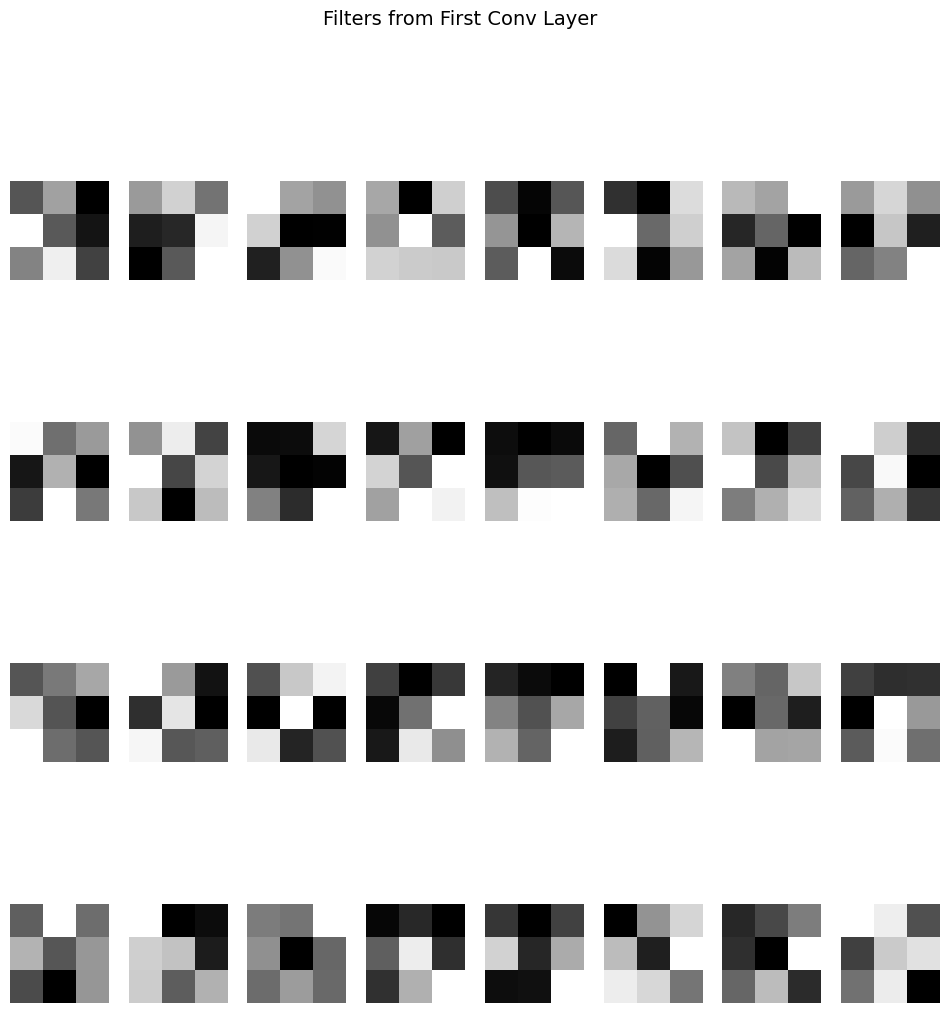

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('net.keras')  # Update with the correct model path

# Print layer names to find the correct Conv2D layer
conv_layers = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
print("Convolutional layers:", conv_layers)  # List available conv layers

# Select the first Conv2D layer dynamically
first_conv_layer = conv_layers[0]  # Get the first Conv2D layer's name
conv_layer = model.get_layer(first_conv_layer)  # Fetch the layer
filters, biases = conv_layer.get_weights()

# Normalize filter values
filters_min, filters_max = filters.min(), filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Plot filters
num_filters = filters.shape[3]
num_cols = 8
num_rows = int(np.ceil(num_filters / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i in range(num_filters):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    filter_image = filters[:, :, 0, i]  # Assuming grayscale input
    ax.imshow(filter_image, cmap='gray')
    ax.axis("off")

plt.suptitle("Filters from First Conv Layer", fontsize=14)
plt.show()


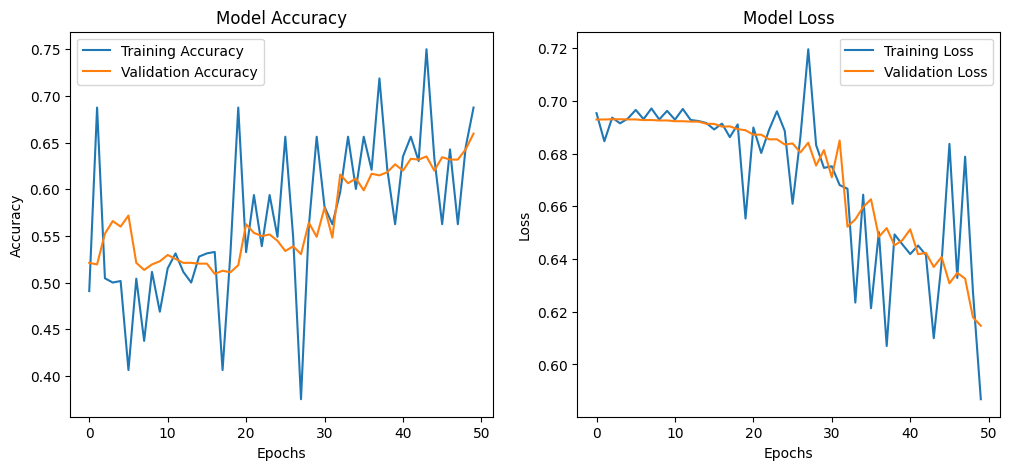

In [20]:
import matplotlib.pyplot as plt

# Extract training history
history_dict = history.history

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


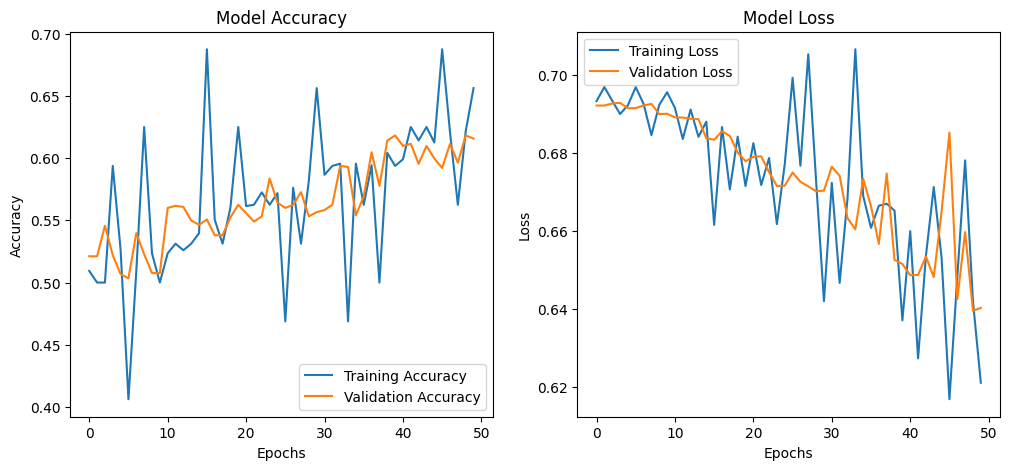

In [21]:
history_fcn_dict = history_fcn.history

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fcn_dict['accuracy'], label='Training Accuracy')
plt.plot(history_fcn_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_fcn_dict['loss'], label='Training Loss')
plt.plot(history_fcn_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

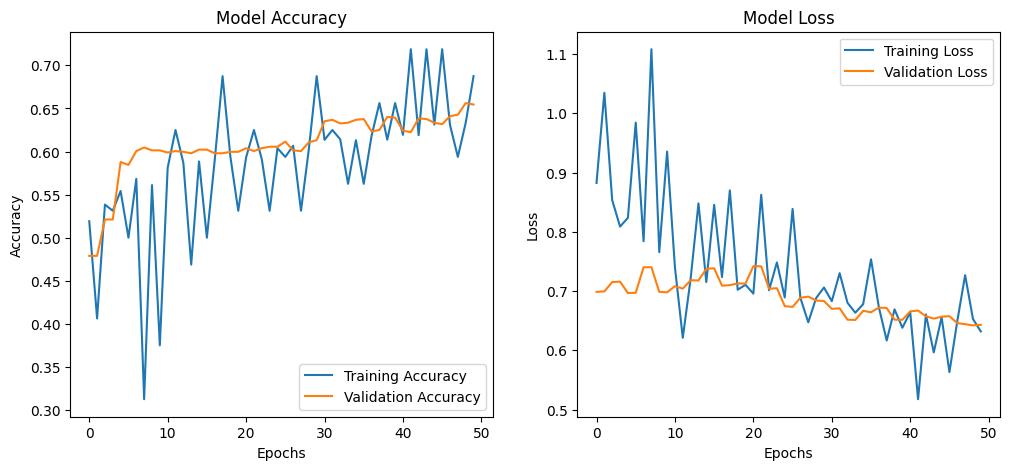

In [22]:
history_fcn_bn_dict = history_fcn_bn.history

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fcn_bn_dict['accuracy'], label='Training Accuracy')
plt.plot(history_fcn_bn_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_fcn_bn_dict['loss'], label='Training Loss')
plt.plot(history_fcn_bn_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

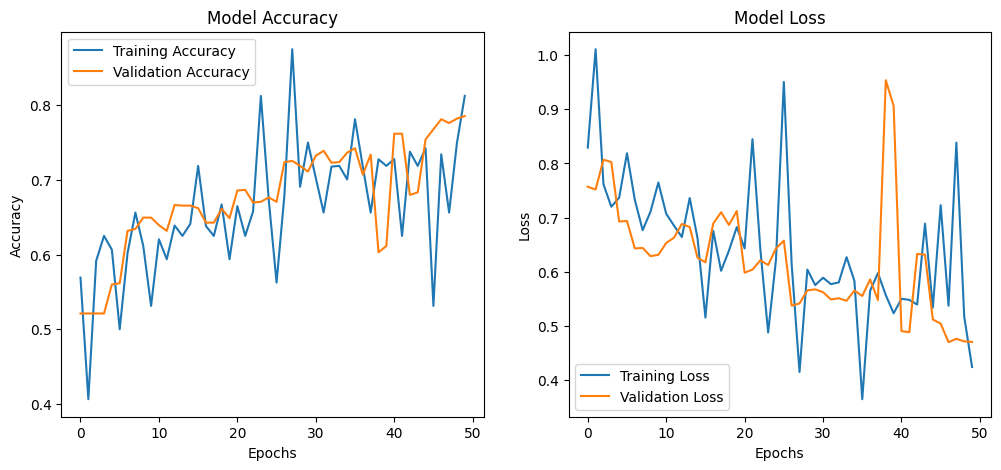

In [23]:
history_resnet_dict = history_resnet.history

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_resnet_dict['accuracy'], label='Training Accuracy')
plt.plot(history_resnet_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet_dict['loss'], label='Training Loss')
plt.plot(history_resnet_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# **Test Preformance**

In [24]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Define paths to your test files
cat_test_dir = 'drive/MyDrive/cat_test'  # Folder with cat test images
dog_test_dir = 'drive/MyDrive/dog_test'  # Folder with dog test images

# Function to load and preprocess images
def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, color_mode='grayscale', target_size=(150, 150))
        img_array = img_to_array(img) / 255.0  # Normalize pixels
        images.append(img_array)
        labels.append(label)  # 0 for cats, 1 for dogs
    return np.array(images), np.array(labels)

# Load test images
X_test_cats, y_test_cats = load_and_preprocess_images(cat_test_dir, label=0)
X_test_dogs, y_test_dogs = load_and_preprocess_images(dog_test_dir, label=1)

# Combine cat and dog test data
X_test = np.concatenate((X_test_cats, X_test_dogs))
y_test = np.concatenate((y_test_cats, y_test_dogs))

# Reshape to match model input (Adding batch dimension)
X_test = np.expand_dims(X_test, axis=-1)  # Model expects shape (None, 150, 150, 1)


In [ ]:
# Load trained model
model = load_model('cat_and_dog_classifier.keras')  # Ensure the correct model file is used

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.5797 - loss: 0.7099
Test Accuracy: 58.82%
Test Loss: 0.7072


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Define paths to your test files
cat_test_dir = 'drive/MyDrive/cat_test'  # Folder with cat test images
dog_test_dir = 'drive/MyDrive/dog_test'  # Folder with dog test images

# Function to load and preprocess images
def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, color_mode='grayscale', target_size=(150, 150))
        img_array = img_to_array(img) / 255.0  # Normalize pixels
        images.append(img_array)
        labels.append(label)  # 0 for cats, 1 for dogs
    return np.array(images), np.array(labels)

# Load test images
X_test_cats, y_test_cats = load_and_preprocess_images(cat_test_dir, label=0)
X_test_dogs, y_test_dogs = load_and_preprocess_images(dog_test_dir, label=1)

# Combine cat and dog test data
X_test = np.concatenate((X_test_cats, X_test_dogs))
y_test = np.concatenate((y_test_cats, y_test_dogs))

# Reshape to match model input (Adding batch dimension)
X_test = np.expand_dims(X_test, axis=-1)  # Model expects shape (None, 150, 150, 1)
# Load trained model
model = load_model('cat_and_dog_classifier_fcn.keras')  # Ensure the correct model file is used

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step - accuracy: 0.5797 - loss: 0.7099
Test Accuracy: 58.82%
Test Loss: 0.7072


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Define paths to your test files
cat_test_dir = 'drive/MyDrive/cat_test'  # Folder with cat test images
dog_test_dir = 'drive/MyDrive/dog_test'  # Folder with dog test images

# Function to load and preprocess images
def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, color_mode='grayscale', target_size=(150, 150))
        img_array = img_to_array(img) / 255.0  # Normalize pixels
        images.append(img_array)
        labels.append(label)  # 0 for cats, 1 for dogs
    return np.array(images), np.array(labels)

# Load test images
X_test_cats, y_test_cats = load_and_preprocess_images(cat_test_dir, label=0)
X_test_dogs, y_test_dogs = load_and_preprocess_images(dog_test_dir, label=1)

# Combine cat and dog test data
X_test = np.concatenate((X_test_cats, X_test_dogs))
y_test = np.concatenate((y_test_cats, y_test_dogs))

# Reshape to match model input (Adding batch dimension)
X_test = np.expand_dims(X_test, axis=-1)  # Model expects shape (None, 150, 150, 1)
# Load trained model
model = load_model('cat_and_dog_classifier_fcn_bn.keras')  # Ensure the correct model file is used

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 0.5797 - loss: 0.7099
Test Accuracy: 58.82%
Test Loss: 0.7072


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Define paths to your test files
cat_test_dir = 'drive/MyDrive/cat_test'  # Folder with cat test images
dog_test_dir = 'drive/MyDrive/dog_test'  # Folder with dog test images

# Function to load and preprocess images
def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, color_mode='grayscale', target_size=(150, 150))
        img_array = img_to_array(img) / 255.0  # Normalize pixels
        images.append(img_array)
        labels.append(label)  # 0 for cats, 1 for dogs
    return np.array(images), np.array(labels)

# Load test images
X_test_cats, y_test_cats = load_and_preprocess_images(cat_test_dir, label=0)
X_test_dogs, y_test_dogs = load_and_preprocess_images(dog_test_dir, label=1)

# Combine cat and dog test data
X_test = np.concatenate((X_test_cats, X_test_dogs))
y_test = np.concatenate((y_test_cats, y_test_dogs))

# Reshape to match model input (Adding batch dimension)
X_test = np.expand_dims(X_test, axis=-1)  # Model expects shape (None, 150, 150, 1)
# Load trained model
model = load_model('cat_and_dog_classifier_resnet.keras')  # Ensure the correct model file is used

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.5797 - loss: 0.7099
Test Accuracy: 58.82%
Test Loss: 0.7072


# **Confusion Matrix**

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step


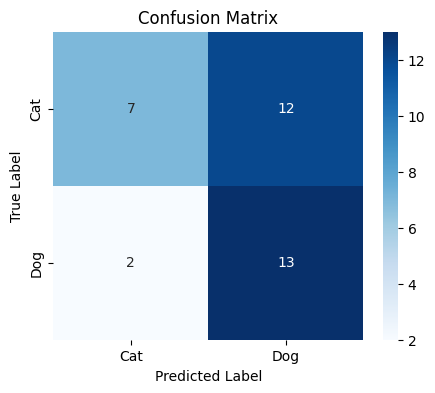

              precision    recall  f1-score   support

         Cat       0.78      0.37      0.50        19
         Dog       0.52      0.87      0.65        15

    accuracy                           0.59        34
   macro avg       0.65      0.62      0.57        34
weighted avg       0.66      0.59      0.57        34



In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions
y_pred_probs = model.predict(X_test)  # Get probability scores
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))
